# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Zaki Kholik Ibrahim
- **Email:** garudasakti2295@gmail.com
- **ID Dicoding:** MC012D5Y1538

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda pada hari kerja dibandingkan dengan akhir pekan berdasarkan jam dalam sehari?
- Bagaimana pengaruh musim terhadap pola penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

ModuleNotFoundError: No module named 'streamlit'

## Data Wrangling

### Gathering Data

In [6]:
day_df = pd.read_csv("https://raw.githubusercontent.com/zakikholik/analisis-data/refs/heads/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/zakikholik/analisis-data/refs/heads/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Mengambil salah satu data yang sudah disediakan.
- Menampilkannya menggunakan program.

### Assessing Data

### Menilai tabel `day_df`

In [9]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [10]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [11]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [12]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Menilai tabel `hour_df`

In [13]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [14]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [15]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [16]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Melihat jumlah baris & kolom, tipe data, dan deskripsi statistik.
- Mengetahui apakah ada nilai yang hilang yang perlu ditangani.

### Cleaning Data

**Insight:**
- Tidak melakukan cleaning data apapun.
- Kedua data sudah dipastikan bersih dari missing value, duplicate data, ataupun inaccurate value.

## Exploratory Data Analysis (EDA)

### Explore `hour_df`

In [24]:
# Mapping hari kerja dan akhir pekan
hour_df["workingday_label"] = hour_df["workingday"].map({0: "Akhir Pekan", 1: "Hari Kerja"})

# Menghitung rata-rata penyewaan sepeda per jam untuk hari kerja dan akhir pekan
hourly_trend = hour_df.groupby(["workingday_label", "hr"])["cnt"].mean().reset_index()

hourly_trend_pivot = hourly_trend.pivot(index="hr", columns="workingday_label", values="cnt")
print(hourly_trend_pivot)

workingday_label  Akhir Pekan  Hari Kerja
hr                                       
0                   90.800000   36.786290
1                   69.508696   16.552632
2                   53.171053    8.683778
3                   25.775330    4.942553
4                    8.264317    5.429787
5                    8.689189   24.913131
6                   18.742358  102.500000
7                   43.406926  290.612903
8                  105.653680  477.006048
9                  171.623377  241.518145
10                 255.909091  135.366935
11                 315.316017  158.229839
12                 366.259740  200.820926
13                 372.731602  198.429719
14                 364.645022  183.572289
15                 358.813853  201.331325
16                 352.727273  293.122244
17                 323.549784  525.290581
18                 281.056522  492.226908
19                 231.673913  348.401606
20                 174.739130  249.718876
21                 142.060870  186

**Insight:**
- Hari kerja memiliki mean penyewaan lebih tinggi pada beberapa jam tertentu, khususnya dari jam 6 - 9 dan jam 17 - 23. Berdasarkan jam - jam tersebut, bisa disimpulkan bahwa penyewaan banyak digunakan untuk kebutuhan berangkat dan pulang kerja ataupun sekolah.
- Penyewaan pada akhir pekan lebih bervariasi, mengindikasikan bahwa akhir pekan, penggunaan sepeda lebih fleksibel dan mungkin lebih terkait dengan rekreasi atau aktivitas santai.

### Explore `day_df`

In [25]:
day_df["season_label"] = day_df["season"].map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})

# Menghitung rata-rata penyewaan berdasarkan musim
season_analysis = day_df.groupby("season_label")["cnt"].agg(["mean", "median", "max", "min", "count"])
print(season_analysis)

                     mean  median   max   min  count
season_label                                        
Fall          5644.303191  5353.5  8714  1115    188
Spring        2604.132597  2209.0  7836   431    181
Summer        4992.331522  4941.5  8362   795    184
Winter        4728.162921  4634.5  8555    22    178


**Insight:**
- Penyewaan sepeda tertinggi terjadi di musim gugur dan musim panas, hal ini mungkin terjadi karena kondisi cuaca yang lebih mendukung untuk bersepeda.
- Penyewaan sepeda paling rendah terjadi di musim semi, hal ini mungkin disebabkan oleh cuaca pada musim semi yang tidak stabil. Selain itu, aktivitas masyarakat masih belum kembali normal setelah peralihan dari musim dingin, masyarakat masih cenderung menggunakan transportasi umum.

### Explore Gabungan `day_df` dan `hour_df`

In [26]:
# Gabungkan data berdasarkan tanggal
merged_df = pd.merge(hour_df, day_df[["dteday", "season_label"]], on="dteday", how="left")

# Menghitung rata-rata penyewaan berdasarkan musim dan jam dalam sehari
season_hourly_trend = merged_df.groupby(["season_label", "hr"])["cnt"].mean().reset_index()
print(season_hourly_trend)

   season_label  hr         cnt
0          Fall   0   73.914439
1          Fall   1   43.720430
2          Fall   2   30.731183
3          Fall   3   15.752688
4          Fall   4    8.240642
..          ...  ..         ...
91       Winter  19  297.033898
92       Winter  20  212.141243
93       Winter  21  161.327684
94       Winter  22  123.564972
95       Winter  23   86.440678

[96 rows x 3 columns]


**Insight:**
- Melihat detail dari pola penyewaan berdasarkan musim.

## Visualization & Explanatory Analysis

### Bagaimana pola penggunaan sepeda pada hari kerja dibandingkan dengan akhir pekan berdasarkan jam dalam sehari?

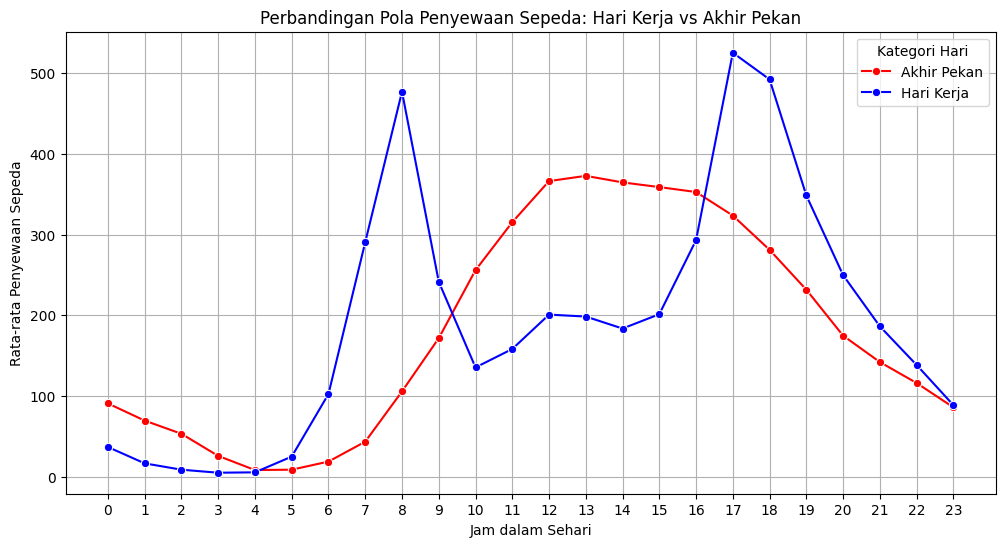

In [32]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="hr", y="cnt", hue="workingday_label", data=hourly_trend, marker="o", palette=["red", "blue"])
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Perbandingan Pola Penyewaan Sepeda: Hari Kerja vs Akhir Pekan")
plt.xticks(range(0, 24))
plt.legend(title="Kategori Hari")
plt.grid(True)
plt.show()

**Insight:**
- Puncak penggunaan di hari kerja terjadi pagi dan sore hari.
- Di akhir pekan, pola lebih merata sepanjang hari.

### Bagaimana pengaruh musim terhadap pola penyewaan sepeda?

<ipython-input-34-f50e55aa390e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_analysis.index, y=season_analysis["mean"], palette="viridis")


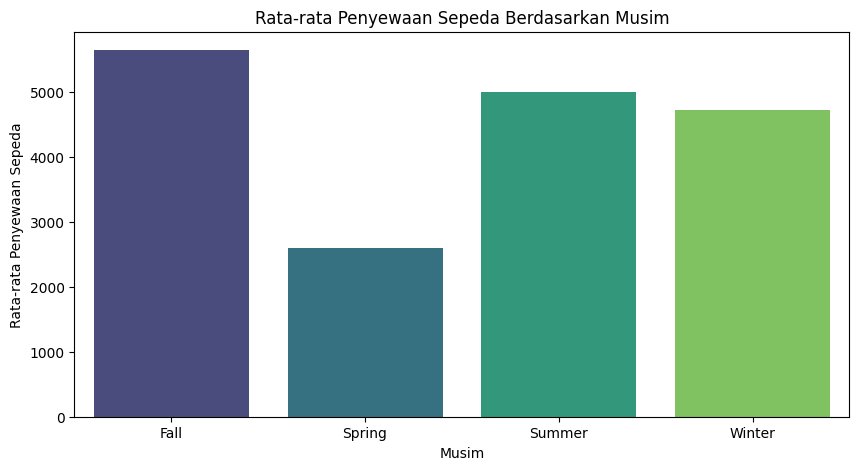

In [34]:
day_df["season_label"] = day_df["season"].map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})

# Menghitung rata-rata penyewaan berdasarkan musim
season_analysis = day_df.groupby("season_label")["cnt"].agg(["mean", "median", "max", "min", "count"])

# Visualisasi dengan bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=season_analysis.index, y=season_analysis["mean"], palette="viridis")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim")
plt.show()

**Insight:**
- Penyewaan tertinggi terjadi di musim panas & gugur.
- Penyewaan rendah di musim dingin karena cuaca tidak mendukung.

## Analisis Lanjutan (Opsional)

## Conclusion

- Hari kerja memiliki puncak pada pagi dan sore hari yang tajam. Akhir pekan memiliki pola penggunaan lebih merata sepanjang hari. Pengelola dapat mengalokasikan sepeda lebih banyak pada jam sibuk di hari kerja dan menyebarkan lebih merata di akhir pekan.
- Puncak penyewaan terjadi pada musim gugur dan musim panas. Pada musim dingin, terjadi penurunan penyewaan karna cuaca tidak mendukung. Pengelola dapat meningkatkan ketersediaan sepeda pada musim panas dan musim gugur. Sedangkan, pada musim dingin diperlukan strategi khusus seperti diskon atau promosi agar jumlah penyewaan tidak terlalu menurun.